In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

In [4]:
df = pd.read_csv('GOOG.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


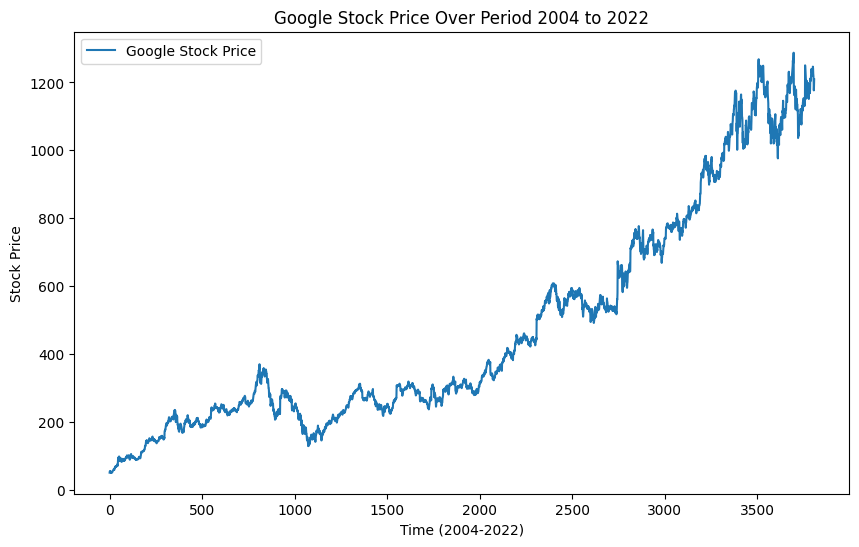

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Google Stock Price')
plt.xlabel('Time (2004-2022)')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Over Period 2004 to 2022')
plt.legend()
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close_scaled'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [8]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [9]:
time_steps = 30  # Number of time steps to look back
X, y = create_dataset(df['Close_scaled'].values, time_steps)

In [10]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [11]:
print(split)

3023


In [12]:
df.iloc[3520]

Date             2018-08-13
Open             1236.97998
High            1249.272949
Low             1233.640991
Close            1235.01001
Adj Close        1235.01001
Volume               997300
Close_scaled       0.957528
Name: 3520, dtype: object

In [13]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
start_time = time.time()

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
76/76 [==============================] - 10s 59ms/step - loss: 0.0026 - val_loss: 3.5681e-04
Epoch 2/10
76/76 [==============================] - 3s 33ms/step - loss: 1.0850e-04 - val_loss: 3.2289e-04
Epoch 3/10
76/76 [==============================] - 3s 42ms/step - loss: 1.0295e-04 - val_loss: 2.8226e-04
Epoch 4/10
76/76 [==============================] - 3s 40ms/step - loss: 9.9064e-05 - val_loss: 2.6741e-04
Epoch 5/10
76/76 [==============================] - 3s 44ms/step - loss: 9.3631e-05 - val_loss: 2.6482e-04
Epoch 6/10
76/76 [==============================] - 3s 36ms/step - loss: 9.2638e-05 - val_loss: 3.7620e-04
Epoch 7/10
76/76 [==============================] - 3s 42ms/step - loss: 8.2987e-05 - val_loss: 4.2058e-04
Epoch 8/10
76/76 [==============================] - 3s 40ms/step - loss: 8.8126e-05 - val_loss: 3.0951e-04
Epoch 9/10
76/76 [==============================] - 3s 34ms/step - loss: 7.8420e-05 - val_loss: 2.5706e-04
Epoch 10/10
76/76 [=====================

In [17]:
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

Training Time: 64.68805480003357 seconds


In [18]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

24/24 [==============================] - 0s 15ms/step - loss: 8.3636e-04
Test Loss: 0.0008363592787645757


In [19]:
start_time = time.time()

In [20]:
predictions = model.predict(X_test)

24/24 [==============================] - 2s 11ms/step


In [21]:
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")

Prediction Time: 15.154841899871826 seconds


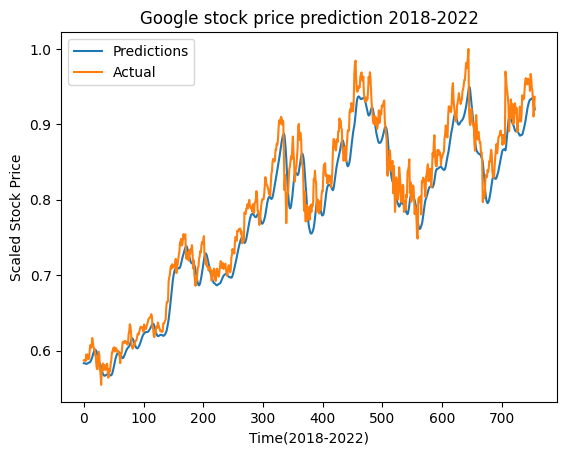

In [22]:
# Plot predictions vs actual
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.xlabel('Time(2018-2022)')
plt.ylabel('Scaled Stock Price')
plt.title("Google stock price prediction 2018-2022")
plt.legend()
plt.show()